# Eerste poging

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import pandas as pd
%matplotlib inline

In [3]:
img_width, img_height, img_num_channels = 112,112,3
batch_size = 5000
training_path = '/home/labuser/deeplearning/thesis/datasets/processed/train'
testing_path = '/home/labuser/deeplearning/thesis/datasets/processed/test'
image_generator = ImageDataGenerator(validation_split=0.1,rescale=1./255)


train_set = image_generator.flow_from_directory(training_path,
                                                 target_size = (img_width, img_height),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
												 shuffle = True,
                                                 color_mode='grayscale',
												 subset = 'training',
                                                seed=1337
												 )
val_set = image_generator.flow_from_directory(training_path,
                                                 target_size = (img_width, img_height),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
												 shuffle = True,
												 subset = 'validation',
                                                seed=1337
												 )

Found 5114 images belonging to 8 classes.
Found 565 images belonging to 8 classes.


{'benign': 0, 'cerber': 1, 'crowti': 2, 'gandcrab': 3, 'genasom': 4, 'locky': 5, 'tescrypt': 6, 'wannacrypt': 7}
[0. 0. 0. 1. 0. 0. 0. 0.]


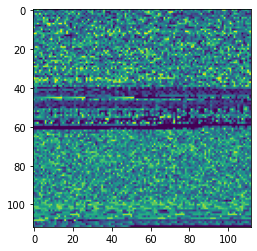

In [4]:
#get first image from the batch
print(train_set.class_indices)
# image.
x,y = next(train_set)
print(y[1])
image = x[1]
#plt.imshow(image.transpose(2,1,0))
plt.imshow(image)
plt.show()

In [7]:
#flatten dataset nxnx3 to nxn
dataset_size = len(x)
x_TwoDim_dataset = x.reshape(dataset_size,-1)


#dataset_size = len(x)
#x_TwoDim_dataset = x.reshape(dataset_size,-1)

In [9]:
#rescale
scaler = StandardScaler()
scaler.fit(x_TwoDim_dataset)
x_sc_train = scaler.transform(x_TwoDim_dataset)
#x_sc_test = scaler.transform(X_test)

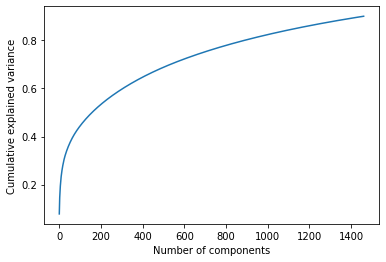

array([0.07810333, 0.03850416, 0.02897565, ..., 0.00013586, 0.00013582,
       0.00013574], dtype=float32)

In [10]:
#https://www.kaggle.com/pmmilewski/pca-decomposition-and-keras-neural-network
"numer of components" #Keras Geron boek p.223 for image data use 2D or 3D
pca = PCA(n_components=.9)
pca.fit(x_sc_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()
#By 29 components high!!
pca.explained_variance_ratio_

In [13]:
#https://www.kaggle.com/tilii7/dimensionality-reduction-pca-tsne
#which means that PCA will hold 90% of the variance and the number of components required to capture 90% variance will be used.
#pca = PCA(0.9)
pca = PCA(n_components=25)
x_pca_train = pca.fit_transform(x_sc_train)
#x_pca_test = pca.transform(x_sc_test)
pca_std = np.std(x_pca_train)

print(pca_std)
print(x_sc_train.shape) # 5000 samples set as batch size
#print(x_pca_train.shape)

#PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
#  svd_solver='auto', tol=0.0, whiten=False)
print(pca.n_components_)
pca.explained_variance_ratio_.sum() # 90% of the data by 25 components

12.439408
(5000, 12544)
25


0.30839232

In [16]:
target_names = np.unique(y)
print(target_names)
#exit()
tsne = TSNE(n_components=2, init='pca', random_state=1001, perplexity=30, method='barnes_hut', n_iter=1000, verbose=1)
X_tsne = tsne.fit_transform(x_sc_train) # this will either fail or take a while (most likely overnight)

plt.figure(2, figsize=(10, 10))

for color, i, target_name in zip(colors, [0, 1], target_names):
     plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], color=color, s=1,
                 alpha=.8, label=target_name, marker='.')
     plt.legend(loc='best', shadow=False, scatterpoints=3)
     plt.title('Scatter plot of t-SNE embedding')
     plt.xlabel('X')
     plt.ylabel('Y')
     #plt.savefig('t-SNE-porto-01.png', dpi=150)
     plt.show()



[0. 1.]
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 13.595s...


KeyboardInterrupt: 

# inverse 

In [177]:
inv_pca = pca.inverse_transform(x_pca_train)
inv_sc = scaler.inverse_transform(inv_pca)

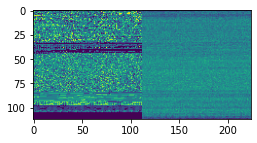

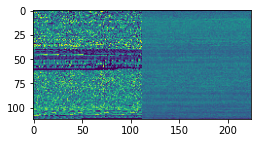

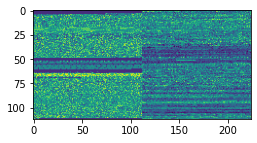

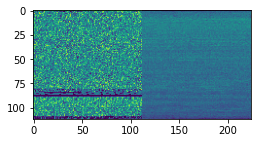

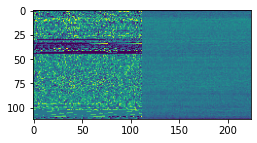

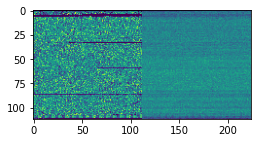

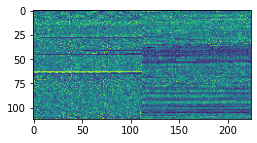

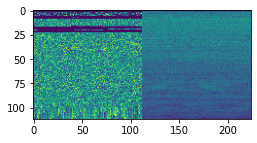

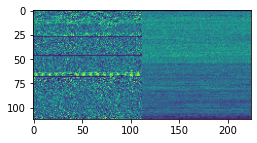

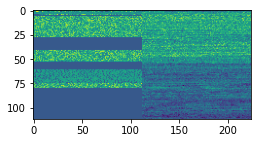

In [178]:
def side_by_side(indexes):
    org = x[indexes].reshape(112,112)
    rec = inv_sc[indexes].reshape(112,112)
    pair = np.concatenate((org, rec), axis=1)
    plt.figure(figsize=(4,2))
    plt.imshow(pair)
    plt.show()
 
#all items a in batch
for index in range(0,10):
    side_by_side(index)

# Methode 2

In [179]:
pca_cifar = PCA(n_components=2)
principalComponents_vtdata = pca_cifar.fit_transform(x_sc_train)
principal_vtdata_Df = pd.DataFrame(data = principalComponents_vtdata
             , columns = ['principal component 1', 'principal component 2'])
principal_vtdata_Df['x'] = x[:32]

ValueError: Wrong number of dimensions. values.ndim != ndim [4 != 2]